
Entrega 3 - ScikitLearn En este documento se presentan 3 problemas a resolver, cada uno orientado a la aplicación de uno de los clasificadores vistos en clases. Elegir uno de ellos y resolverlo de acuerdo a las especificaciones dadas. Es importante hacer un análisis de los resultados obtenidos como se especifíca en los enunciados. Cuando haya finalizado, cargue el archivo ipynb con el código y las conclusiones correspondientes. Nota: En el caso de los métodos de aprendizaje supervisado, separe el conjunto train-test con una semilla fija para que al evaluar la actividad la cátedra tenga los mismos conjuntos de datos que usó en el desarrollo.

SVM

Un supermercado quiere diseñar un sistema para indicarle a sus clientes que tan lleno está el estacionamiento en su página web. El programador al que contrató le pidió que colocara una cámara que tome fotos del estacionamiento regularmente, y al cabo de un tiempo se formuló un dataset, con 300 imágenes del estacionamiento bastante lleno, y otras 300 del estacionamiento bastante vacío, con distintas condiciones de clima y hora del día.

Formatee la información del dataset a una reconocible por Scikit Learn, y separelas adecuadamente en sets de entrenamiento y de testeo. Considere que usar excesiva cantidad de información puede ser contraproducente para la red, ¿cómo puede optimizar el tiempo empleado en formatear los datos, sin empeorar o incluso mejorando el desempeño del clasificador?
Diseñe un clasificador SVM, con sus parámetros ajustados de forma de obtener el mejor desempeño posible.
Grafique la matriz de confusión del sistema, y escriba un pequeño análisis de la información que ésta le brinda.
Prediga los datos de testeo usando probabilidad y grafique aquellos datos en los que el clasificador se equivocó, ¿Nota alguna relación entre los mismos y la probabilidad en cada caso? ¿En todos los casos hubo unanimidad del clasificador? Escriba un breve análisis al respecto.
Escriba una función que reciba la ruta de una imagen, y devuelva "El estacionamiento se encuentra casi lleno" o "El estacionamiento cuenta con varios lugares disponibles" según corresponda. Pruébela con las siguientes cinco imágenes, y juzgue a su criterio si se realizaron buenas predicciones en todos los casos. En cada caso prediga también con probabilidad.
¿Habría sido factible usar otro tipo de máquina para la tarea? ¿Qué cree que habría pasado si se usaba un KMeans con dos clusters?

Intalo las librerias correspondientes

In [1]:
!pip install sklearn
!pip install matplotlib
!pip install numpy 
!pip install pandas
!pip install pillow 
from sklearn import metrics #Para utilizar la matriz de confusion
from sklearn.svm import SVC#importo el clasiicador con el cual voy a trabajar
from sklearn.model_selection import train_test_split #para poder entrenar y testear el clasificador
import os # esta la utilizo para leer de las carpetas las imagenes que voy a utilizar en el SVM
from skimage.transform import resize #Esta la utilizo para darle el mismo tamaño a todas las imagenes
from skimage.io import imread #Esta la utilizo para leer todas las imagenes de manera mas sencilla
from sklearn.utils import shuffle
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Creo la estructura de mi dataset para trabajar con el clasificador. Este bloque de código optimiza la lectura de la información para que pueda leerlo de manera correcta el svc. Tener en cuenta que también las imagenes se reducen (yo opte reducirlas en 10 es decir 1280/10 * 720/10) para reducir el tamaño de informacion (debido a que originalmente cada imagen es de 1280*760 pixeles con sus respectivos valores de Azul, Verde y Rojo) y facilitar el modelo sin perder eficiencia.

In [2]:
categorias=["Muchos Autos","Pocos Autos"] #creo las categorias de clasiicación del clasiicador
data_array=[] #Este va a ser mi array de data de entrada
target_array=[] #Este va a ser mi array de target
ruta_array=[] #Guardo la ruta de las imagenes para mas adelante

data_directorio="/content/drive/MyDrive/Colab Notebooks/Proyecto 3 /Categorias" #Esta es la ruta de la carpeta que contiene las subcarpetas con las categorias Muchos Auotos y Pocos autos con sus respectivas imagenes. Esta es la ruta que se tiene que modificar para probar el programa

for i in categorias: #creo el ciclo para leer las carpetas de imagenes de cada categoria
    print(f'Cargando categoria : {i}')
    ruta=os.path.join(data_directorio,i) #Le estoy pasando la direccion de la carpeta de la primer categoria en la primer iteracion (Muchos Autos) y en la segunda la de Pocos Autos
    for img in os.listdir(ruta): #estoy ciclando dentro de la carpeta de la primer categoria en todas sus imagenes (Me devuelve la ruta de cada una de las imagenes dentro de la correspondiente carpeta durante la correspondiente iteración)
        ruta_array.append(os.path.join(ruta,img))
        img_array=imread(os.path.join(ruta,img)) #Leo imagen por imagen y lo agrego al array de imagenes (el formato es una matriz de columnas* filas agregando las filas de los colores azul,verde,rojo y transparente) con imread que me da un array
        img_resized=resize(img_array,(1280/10,720/10,3)) #Redimensiono la imagen (segun vi dentro de la carpeta de imagenes todas parecen estar en 1280 x 720 pero con esto dejo todas con el mismo tamaño) disminuir el tamaño de las imagenes en 10 debido a que colab me tiraba error de RAM. Si bien pierdo informacion en las imagenes, esto me mejora el rendimiento del clasificador porque tiene menos informacion que procesar y no pierdo eficacia (Lo testie con distintos tamaños)
        data_array.append(img_resized.flatten()) #con este metodo de numpy redimensiono el array de la imagen en uno de una sola dimension 
        target_array.append(categorias.index(i)) #Guardo el indice de la categoria dentro del target en este caso 0 o 1 
    print(f'Guardando categoria : {i} satisfactoriamente')

ruta_imagenes=np.array(ruta_array) #creo el arreglo de numpy de las rutas de las imagenes
data=np.array(data_array) #creo el arreglo de numpy de danta de entrada
target=np.array(target_array) #creo el arreglo de numpy de target de salida

dataframe=pd.DataFrame(data) #creo el dataframe con todas las imagenes cada una de ellas corresponde a una fila en particular del dataframe y tiene filas(1280/10)*columnas(720/10)*3(canales RGB) columnas  
dataframe["Target"]=target #creo la columna con los targets de cada imagen (valor 0 Muchos Autos - Valor 1 Pocos Autos)

#Este proceso se reduce sustancialmente reduciendo el tamaño de las imagenes con el resize ya que hace mas facil la tarea de lectura para crear el modelo y a su vez no se pierde rendimiento 


Cargando categoria : Muchos Autos
Guardando categoria : Muchos Autos satisfactoriamente
Cargando categoria : Pocos Autos
Guardando categoria : Pocos Autos satisfactoriamente


Separo la informacion para crear mi clasificador SVM

In [3]:
X=dataframe.iloc[:,:-1] #Todas las filas y todas las columnas menos la ultima que es la de los targets (600 imagenes convertidas en vectores de 1280/10 * 720/10 *3 con los valores de rojo,verde y azul para cada pixel)
Y=dataframe.iloc[:,-1] #Todas las filas con la ultima columna que es la de los target (contiene el valor de la clasificacion: 0 o 1)
#print(X) #para corroborar lo comentado
#print(Y) #para corroborar lo comentado (en target tenemos que 0 corresponde a "Muchos Autos" y 1 a "Pocos Autos") Se puede ver con este print que los datos estan ordenados siendo los primeros los de Muchos Autos y luego los de Pocos Autos



Separo los valores de training y testeo.

In [4]:
#dividir el dataset de training y testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1) #utilizo el 20% como testeo y el 80$ como entrenamiento dejo random_state=1 para congelar el aleatorio

TRAINING

Creo el modelo con gamma = 0.01 y lo entreno.

In [6]:
# Creo el modelo y lo entreno
clf = SVC(gamma=0.01) #creo el clasificador con gamma = 0,01
clf.fit(X_train, Y_train)

SVC(gamma=0.01)

In [7]:
# Testeo (pruebo el clasificador con datos de testing)
score = clf.score(X_test, Y_test)
print('Precisión = ', score)
print()

Precisión =  0.9833333333333333



Pruebo con gamma = 0.001. NOTA: UTILIZAR ESTE PARA CONTINUAR, EL RESTO FUE UTILIZADO PARA MOSTRAR QUE EL MEJOR RENDIMIENTO ERA CON ESTOS PARAMETROS

In [5]:
# Creo el modelo y lo entreno
clf = SVC(gamma=0.001, C=1,probability=True) #creo el clasificador con gamma = 0,001. Utilizo C=1 que es el estandard por default tambien probe con otros valores obteniendo valores similares de score. El probability lo coloco en true para usar el predict_proba
clf.fit(X_train, Y_train)

SVC(C=1, gamma=0.001, probability=True)

In [6]:
# Testeo (pruebo el clasificador con datos de testing)
score = clf.score(X_test, Y_test)
print('Precisión = ', score)
print()

Precisión =  0.9833333333333333



Pruebo con gamma = 0.1

In [10]:
# Creo el modelo y lo entreno
clf = SVC(gamma=0.1) #creo el clasificador con gamma = 0,1
clf.fit(X_train, Y_train)

SVC(gamma=0.1)

In [11]:
# Testeo (pruebo el clasificador con datos de testing)
score = clf.score(X_test, Y_test)
print('Precisión = ', score)
print()

Precisión =  0.75



Pruebo con gamma = 1

In [12]:
# Creo el modelo y lo entreno
clf = SVC(gamma=1) #creo el clasificador con gamma = 1
clf.fit(X_train, Y_train)

SVC(gamma=1)

In [13]:
# Testeo (pruebo el clasificador con datos de testing)
score = clf.score(X_test, Y_test)
print('Precisión = ', score)
print()

Precisión =  0.5916666666666667



TESTING

Luego de probar varios gamma vemos que el gamma = 0.001 nos da mayor precision (luego de probar ejecutar el bloque de codigo correspondiente a gamma=0,001  para que el clasificador quede con la mayor presición)

In [7]:
#testeo
#print(Y_test) #para visulalizar lo que hay en los Y_test
if Y_test.head(1).iloc[0]==0: #Los If estan hechos para que me muestre el nombre de la categoria y no el número. En este caso tengo que usar .head(1) para tomar el primer valor ya que los indices estan desordenados y asegurarme que estoy mostrando el valor de Y_test y de Y_pred del mismo X_test
 print("Categoria real asignada en Y_test de la primer imagen de X_test: Muchos Autos") #Estamos mostrando el valor de target real de la primer imagen que se encuentra en X_test. Si es 0 es Muchos Autos si es 1 es Pocos Autos
else:
 print("Categoria real asignada en Y_test de la primer imagen de X_test: Pocos Autos")
Y_pred = clf.predict(X_test) #predigo los X_test
if Y_pred[0]==0: #Estamos mostrando el valor predicho por el clasificador a ver si actuo de manera correcta
 print('Categoria predicha (Y_pred) de la primer imagen de X_test por el clasificador: Muchos Autos ')
else:
 print("Categoria predicha (Y_pred) de la primer imagen de X_test por el clasificador: Pocos Autos")

#print(X_test)
#print(Y_test.head(1))
#print(Y_test.head(1).iloc[0])
#print(Y_pred[0]) #Todos estos print se pueden utilizar para visulalizar que la informacion que esta mostrando del target real y del target predicho por el clasificador corresponden al mismo valor de X_test

Categoria real asignada en Y_test de la primer imagen de X_test: Pocos Autos
Categoria predicha (Y_pred) de la primer imagen de X_test por el clasificador: Pocos Autos


Matriz de confusion

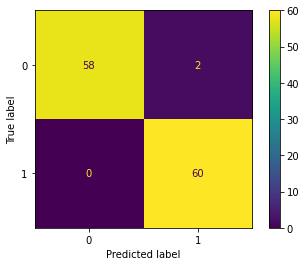

In [8]:
#creo la matriz de confusion
sp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.show()
print()

Podemos evaluar en la matriz de confusión que el total de testeo fueron de 120 muestras (el 20% como lo establecimos durante el split, el 100% sería 600 -Que son las 300 fotos de Muchos Autos sumadas las 300 fotos de Pocos Autos-). Dentro de la diagonal vemos los aciertos en la predicción respecto a los valores originales (tenemos 58 aciertos para la categoria 0 -Muchos Autos- y 60 aciertos para la categoria 1 -Pocos Autos-, los valores que se encuentran fuera de la diagonal fueron los casos particulares en los cual el clasificador predijo algo de forma erronea - en este caso 2 imagenes en el cual se confudió Pocos Autos con Muchos Autos-).

También podemos ver que la efectividad en el score del clasificador es del 98.3333 %. En la matriz de confusión vemos que 2 errores / 120 que es el total nos da un valor del 1.6666%. Con esto vemos que el valor de efectividad se refleja en la matriz de confusión (100%-1.6666%= 98.3333% -este es el score de efectividad-). Es decir que podiamos deducir antes de graficar la matriz de confusión que el clasificador tuvo 2 errores (1.6666%).

Predecir los datos de testeo con probabilidad.

In [11]:
X_test_reindex=X_test.reset_index() #reseteo el indice de los X_test para poder ciclar dentro del for (ya que las imagenes estan mezcladas) de esta manera puedo comparar con un mismo ciclo for los X_test, Y_test e Y_pred
for i in range (0,120): #ciclo en todas las imagenes de testo (no muestro todas, solo lo hago en para las cuales el clasificador se equivoco pero en el proximo bloque de codigo aca solo predigo con probabilidad)
  print("En la imagen: ",int(X_test_reindex.iloc[i]["index"]),"el clasificador clasifico tomando en cuenta las siguientes probabilidades: ")
  print()
  Y_proba=clf.predict_proba(X_test_reindex.iloc[[i],1:]) #predigo los datos de testeo con probabilidad y los imprimo
  print(Y_proba[0][0]*100,"% Para la categoria Muchos Autos")
  print()
  print(Y_proba[0][1]*100,"% Para la categoria Pocos Autos")
  print()
  print()


En la imagen:  446 el clasificador clasifico tomando en cuenta las siguientes probabilidades: 

0.46540109127074636 % Para la categoria Muchos Autos

99.53459890872928 % Para la categoria Pocos Autos


En la imagen:  404 el clasificador clasifico tomando en cuenta las siguientes probabilidades: 

2.0730141906992463 % Para la categoria Muchos Autos

97.92698580930079 % Para la categoria Pocos Autos


En la imagen:  509 el clasificador clasifico tomando en cuenta las siguientes probabilidades: 

0.514849745465374 % Para la categoria Muchos Autos

99.48515025453463 % Para la categoria Pocos Autos


En la imagen:  455 el clasificador clasifico tomando en cuenta las siguientes probabilidades: 

0.30047465382825006 % Para la categoria Muchos Autos

99.69952534617175 % Para la categoria Pocos Autos


En la imagen:  201 el clasificador clasifico tomando en cuenta las siguientes probabilidades: 

98.97434396714708 % Para la categoria Muchos Autos

1.025656032852924 % Para la categoria Pocos Aut

Grafico los casos en el que el clasificador se equivoco

En la imagen:  132 del X_test el clasificador se confundio de clase



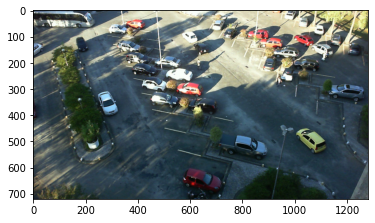


Las probabilidades para cada clase eran de: 

5.92128520297612 % Para la categoria Muchos Autos

94.07871479702388 % Para la categoria Pocos Autos

El clasificador predijo: Pocos Autos

Cuando deberia haber predicho: Muchos Autos

En la imagen:  9 del X_test el clasificador se confundio de clase



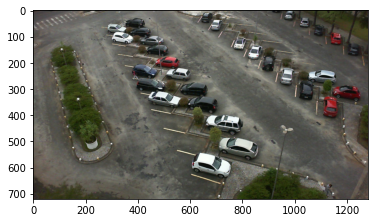


Las probabilidades para cada clase eran de: 

48.4545087934484 % Para la categoria Muchos Autos

51.54549120655162 % Para la categoria Pocos Autos

El clasificador predijo: Pocos Autos

Cuando deberia haber predicho: Muchos Autos



In [12]:
#reseteo el indice de los Y_test al igual que hice con los  X_test para poder ciclar dentro de un for y poder comparar con los Y_pred y ver cual fue los casos en los que se equivoco mostrando la probabilidad
Y_test_reindex=Y_test.reset_index()
#print(Y_test_reindex) #Uso esta linea de codigo para verificar lo anteriormente explicado
#print(X_test_reindex) #idem anterior
for i in range(0,120): #recorro las 120 imagenes de testeo
 if Y_test_reindex.iloc[i][1]!= Y_pred[i]: #accedo fila por fila al valor del target de los Y_test_reindex y los comparo con los de Y_pred
   proba_error=clf.predict_proba(X_test_reindex.iloc[[i],1:])
   print("En la imagen: ",int(X_test_reindex.iloc[i]["index"]), "del X_test el clasificador se confundio de clase" )
   print()
   img_error=imread(ruta_imagenes[int(X_test_reindex.iloc[i]["index"])]) #UTilizo el array de rutas para mostrar la imagen donde se equivoco (Tener en cuenta que mas alla de haber separado el dataset en train y test y averse mezclado los indices siempre se mantienen por consiguiente corresponden a los de la ruta de las imagenes)
   plt.imshow(img_error)
   plt.show()
   print()
   print("Las probabilidades para cada clase eran de: ")
   print()
   print(proba_error[0][0]*100,"% Para la categoria Muchos Autos")
   print()
   print(proba_error[0][1]*100,"% Para la categoria Pocos Autos")
   print()
   print("El clasificador predijo:",categorias[Y_pred[i]])
   print()
   print("Cuando deberia haber predicho:",categorias[Y_test_reindex.iloc[i][1]])
   print()

   

Podemos ver en el analisis de las imagenes donde el clasificador se equivoco dos casos distintos. En la imagen 132 del X_test la misma estaba clasificada como Muchos Autos y el clasificador predijo Pocos Autos pero tambien podria haber sido clasificada como Pocos Autos(analizando la imagen lo podemos ver - es decir que puede ser un error humano al clasificar con una imagen que puede confundir) pero la probabilidad fue porcentualmente mayor en una direccion (94 % vs 6 %). En el caso de la imagen numero 9 del X_test vemos que la probabilidad era casi de 50 % vs 50 % y opto por la prediccion equivocada. Vemos que en esa imagen tambien hay autos y el humano separo esa imagen en muchos autos para entrenar al clasificador pero este opto por la opcion de Pocos Autos. En el primer caso el clasificador tomo una desicion unanime hacia una categoria que fue la erronea y en el siguiente caso el clasificador tuvo que elegir en un 50% y 50% asi que no fue unanime y termino equivocandose.

 Escriba una función que reciba la ruta de una imagen, y devuelva "El estacionamiento se encuentra casi lleno" o "El estacionamiento cuenta con varios lugares disponibles" según corresponda. Pruébela con las siguientes cinco imágenes, y juzgue a su criterio si se realizaron buenas predicciones en todos los casos. En cada caso prediga también con probabilidad. ¿Habría sido factible usar otro tipo de máquina para la tarea? ¿Qué cree que habría pasado si se usaba un KMeans con dos clusters?



Mostrando imagen:  1



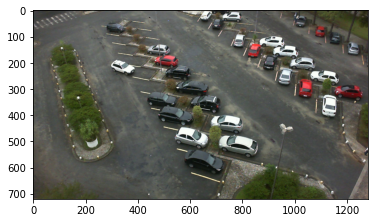


Las probabilidades con las cuales predijo el clasificador fueron: 

17.858091129909745 % Para la categoria Muchos Autos

82.14190887009025 % Para la categoria Pocos Autos

El estacionamiento cuenta con varios lugares disponibles


Mostrando imagen:  2



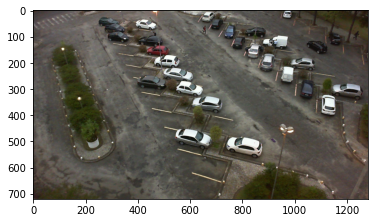


Las probabilidades con las cuales predijo el clasificador fueron: 

9.513896125403939 % Para la categoria Muchos Autos

90.48610387459608 % Para la categoria Pocos Autos

El estacionamiento cuenta con varios lugares disponibles


Mostrando imagen:  3



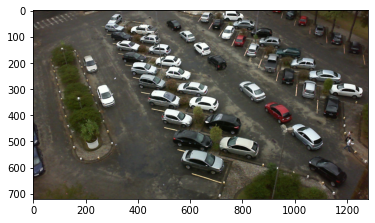


Las probabilidades con las cuales predijo el clasificador fueron: 

89.9555685964234 % Para la categoria Muchos Autos

10.044431403576601 % Para la categoria Pocos Autos

El estacionamiento se encuentra casi lleno


Mostrando imagen:  4



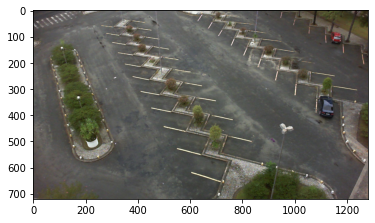


Las probabilidades con las cuales predijo el clasificador fueron: 

0.0017899513059060849 % Para la categoria Muchos Autos

99.99821004869409 % Para la categoria Pocos Autos

El estacionamiento cuenta con varios lugares disponibles


Mostrando imagen:  5



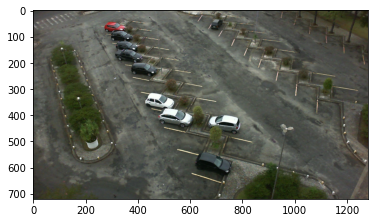


Las probabilidades con las cuales predijo el clasificador fueron: 

5.04714459032138 % Para la categoria Muchos Autos

94.95285540967862 % Para la categoria Pocos Autos

El estacionamiento cuenta con varios lugares disponibles




In [16]:
def estacionamiento(ruta_1): #creo la funcion que va a recibir la ruta de la carpeta que contiene la imagen para luego clasificar la imagen. Es decir que basta con colocar la imagen dentro de esa carpeta para que la funcion trabaje.
  cont=0
  for x in os.listdir(ruta_1): #recorro todas las imagenes en la carpeta de imagenes de prueba
   cont=cont+1 #Creo este contador para diferenciar las imagenes en su analisis
   print("Mostrando imagen: ",cont)
   print()
   img_ruta1=imread(os.path.join(ruta_1,x)) #creo el array (matriz con los valores tal cual el metodo de carga)
   plt.imshow(img_ruta1) #muestro la imagen
   plt.show()
   img_resized_1=resize(img_ruta1,(1280/10,720/10,3)) #redimensiono las imagenes
   img_flatten=img_resized_1.flatten() #dejo el array con una sola dimensión al igual que se hizo para crear el modelo de cada imagen
   pred = clf.predict(img_flatten.reshape(1,-1)) #Utilizo la imagen en el clasificador y dejo que este prediga
   probabilidad=clf.predict_proba(img_flatten.reshape(1,-1)) #calculo tambien la probabilidad
   print()
   print("Las probabilidades con las cuales predijo el clasificador fueron: ")
   print()
   print(probabilidad[0][0]*100,"% Para la categoria Muchos Autos")
   print()
   print(probabilidad[0][1]*100,"% Para la categoria Pocos Autos")
   print()
   if pred==0:
    print('El estacionamiento se encuentra casi lleno')
    print()
    print()
   else:
    print("El estacionamiento cuenta con varios lugares disponibles")
    print()
    print()

directorio_prueba="/content/drive/MyDrive/Colab Notebooks/Proyecto 3 /Prueba" #coloco la direccion de la carpeta de prueba esto hay que modificarlo segun el dispositivo para que funcione. Podria haber pasado la ruta de una sola imagen pero de esta manera proceso las 5 imagenes o las que haya en la ruta de la carpeta.

estacionamiento(directorio_prueba)

Analisis

Segun mi criterio el clasificador fue bastante certero. 


1- La imagen numero 1 muestra el estacionamiento con algunos autos, si bien es cuestionable la resolucion del clasificador (ya que es claro el hecho de que los casos donde el estacionamiento este a la mitad de su capacidad son los que mas generan confusion al clasificador al tener solo dos clases y dependen mucho de la division que haya tomado el humano al momento de establecer cuales eran Muchos Autos y cuales Pocos Autos) considero que su elección esta dentro de el criterio que se tomo para la eleccion de imagenes de Pocos Autos luego de haber investigado la carpeta de imagenes de entrenamiento.

2- La imagen numero 2 muestra un estacionamiento con apenas menos autos que la imagen numero 1 (es apenas perceptible al ojo) pero vemos que tambien la probabilidad varia en ese sentido ya que ahora es mayor la probabilidad de la clase "Pocos Autos" que en el caso de la imagen numero 1, y esto tiene sentido por lo que mencione al principio.

3- La imagen numero 3 es un claro ejemplo de un estacionamiento lleno, por consiguiente los resultados del clasificador son acertados ya que con una probabilidad del casi 90% predijo la categoria "Muchos autos". 

4- La imagen numero 4 es la condicion opuesta a la imagen numero 3 y muestra un estacionamiento vacio. Podemos ver que el clasificador predijo con una probabilidad del 99% la clase "Pocos Autos" reafirmando un adecuado comportamiento.

5- Esta imagen muestra un estacionamiento casi vacio y otra vez el clasificar predice con una probabilidad del 95% la clase "Pocos Autos" y debido a esto reafirmo el buen criterio del mismo para seleccionar la misma.

Como un analisis general puedo decir que para los casos mas extremos donde el estacionamiento esta casi lleno o casi vacio, el clasificador actua de una manera apropiada con una efectividad clara. Esta claro que para los casos donde el estacionamiento esta a la mitad de su capacidad es donde mas falla. Esto último tiene mucbo sentido ya que al no tener referencia de lo que significa estar a mitad de capacidad podria tomar la decision para cualquiera de las dos clases. Por consiguiente podemos ver que si agregamos una clase con una carpeta de imagenes del estacionamiento a mitad de capacidad podriamos obtener un clasificador que trabajaria mucho mejor para esta tarea.


En cuanto a ver si se podria haber utilizado otro tipo de maquina para la tarea, mi respuesta es si. Se podria haber utilizado un KNN que quizas habria permitido en los casos donde el estacionamiento estaba a mitad de capacidad compararlo con los vecinos cercanos y quizas haber obtenido un resultado mas acertado en ese tipo de casos (pero al igual que mencione anteriormente va a depender de las imagenes que tome el humano para clasificar las clases por consiguiente no puedo asegurar sino solo suponer que hubiera sido mas efectivo- Para los casos de lleno o vacio hubiera trabajado con una efectividad similar).

En el caso de un clasificador K-Means con dos clusters el clasificador hubiera agrupado los centroides en las posiciones de Muchos Autos y Pocos Autos (Pero no necesariamente los centroides hubieran estado en los casos extremos, es decir totalmente lleno o totalmente vacio, sino quizas en casos mas proximos a mitad de capacidad -Reitero esto depende de la seleccón de imagenes del humano). Pero para el caso de las imagenes con el estacionamiento a mitad de capacidad,a mi criterio, hubiera sido mas certero ya que hubiera trabajado por proximidad a los centroides y dependiendo de la cantidad de autos en la imagen hubiera clasificado en una clase u otra. Aún asi considero que para esta tarea hubiera sido mas efectivo crear un clasificador con 3 clusters (este seria estacionamiento a mitad de capacidad). También tengamos en cuenta que el K-Means es un clasificador no supervisado por consiguiente la creacion de las clases (posición de los centroides) del clasificador va a depender de la selección de imagenes que nosotros le brindemos, por este motivo el trabajo de campo que tomemos nosotros es muy importante al momento de entrenarlo para saber de manera estimativa la posición de los clusters.